In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
from NEAT.genome import Genome

g1 = Genome(2, 3)

In [3]:
for i in range(20):
    g1.mutate()

In [4]:
for i in g1.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN
9 HIDDEN


In [5]:
list_edges = []
for nodes, conn in g1.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges.append(nodes)

(1, 3) -0.003026400000000001 True 1
(1, 4) 0.7462702724400008 True 2
(1, 5) -0.009438958190592008 False 3
(2, 3) -0.022400000000000003 False 4
(2, 4) -0.01797025538880001 True 5
(2, 5) -9.924314400000009e-05 False 6
(2, 6) -0.17640000000000003 True 7
(6, 3) 0.3198000000000001 True 8
(2, 7) -0.0033776028000000024 True 9
(7, 5) 0.5548800000000003 True 10
(7, 4) 0.17010000000000006 True 11
(1, 8) 0.72 True 12
(8, 5) 0.4200000000000001 True 13
(2, 9) -0.0068000000000000005 True 14
(9, 3) 0.14 True 15


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN
9 HIDDEN


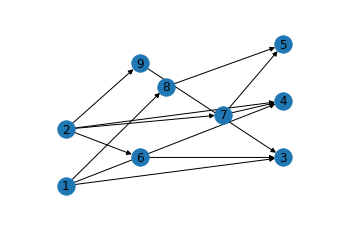

In [6]:
left_nodes = []
middle_nodes = []
right_nodes = []

for i in g1.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes.append(i.id)
    else:   # OUTPUT
        right_nodes.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

G = nx.DiGraph()
G.add_edges_from(list_edges)
nx.draw_networkx(G, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [7]:
g2 = Genome(2, 3)
for i in range(20):
    g2.mutate()

In [8]:
for i in g2.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


In [9]:
list_edges2 = []
list_conn2 = []
for nodes, conn in g2.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    list_conn2.append(conn)
    if conn.Enabled:
        list_edges2.append(nodes)

(1, 3) -0.034422011559936024 False 1
(1, 4) -0.8008089600000005 False 2
(1, 5) 0.033264000000000016 False 3
(2, 3) -0.0028378350000000017 True 4
(2, 4) 3.1113073758412826 True 5
(2, 5) -0.013988318198400013 True 6
(1, 6) 0.0018931200000000007 False 16
(6, 5) 1.215 True 17
(1, 7) 0.006793818071040005 True 18
(7, 3) 0.4200000000000001 True 19
(1, 8) -0.006744240000000003 True 12
(8, 6) 0.27 True 20


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


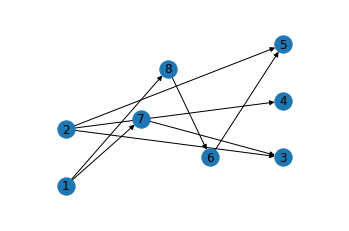

In [10]:
left_nodes2 = []
middle_nodes2 = []
right_nodes2 = []

for i in g2.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes2.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes2.append(i.id)
    else:   # OUTPUT
        right_nodes2.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes2)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes2)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes2)})

G2 = nx.DiGraph()
G2.add_edges_from(list_edges2)
nx.draw_networkx(G2, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [11]:
from NEAT.species import Species

gens = [g1, g2]

In [12]:
s = Species(.5, gens, 1, 1, 1)
offspring: Genome = s.cross_over(g1, g2)

In [13]:
for i in offspring.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN
9 HIDDEN


In [14]:
list_edges3 = []
for nodes, conn in offspring.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges3.append(nodes)

(8, 6) 0.27 True 20
(7, 3) 0.4200000000000001 True 19
(1, 7) 0.006793818071040005 True 18
(6, 5) 1.215 True 17
(1, 6) 0.0018931200000000007 False 16
(9, 3) 0.14 True 15
(2, 9) -0.0068000000000000005 True 14
(8, 5) 0.4200000000000001 True 13
(1, 8) 0.35662788 True 12
(7, 4) 0.17010000000000006 True 11
(7, 5) 0.5548800000000003 True 10
(2, 7) -0.0033776028000000024 True 9
(6, 3) 0.3198000000000001 True 8
(2, 6) -0.17640000000000003 True 7
(2, 5) -0.0070437806712000065 False 6
(2, 4) 1.5466685602262413 True 5
(2, 3) -0.012618917500000002 False 4
(1, 5) 0.011912520904704004 False 3
(1, 4) -0.027269343779999844 True 2
(1, 3) -0.01872420577996801 True 1


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN
9 HIDDEN


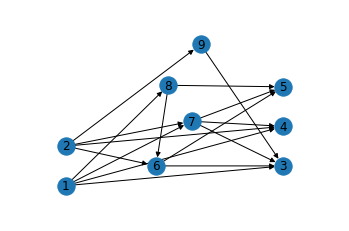

In [15]:
left_nodes3 = []
middle_nodes3 = []
right_nodes3 = []

for i in offspring.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes3.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes3.append(i.id)
    else:   # OUTPUT
        right_nodes3.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes3)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes3)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes3)})

G3 = nx.DiGraph()
G3.add_edges_from(list_edges3)
nx.draw_networkx(G3, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()